# Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from sklearn.cluster import KMeans

sns.set()

# Extracting and Discovering the DataSet

In [5]:
data = pd.read_csv("3.01.+Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
data.describe(include = 'all')

,Country,Latitude,Longitude,Language
count,6,6.000000,6.000000,6
unique,6,NaN,NaN,3
top,USA,NaN,NaN,English
freq,1,NaN,NaN,4
mean,NaN,38.971667,-9.531667,NaN
std,NaN,32.155820,86.523904,NaN
min,NaN,-25.450000,-103.770000,NaN
25%,NaN,45.415000,-73.232500,NaN
50%,NaN,48.950000,-0.065000,NaN
75%,NaN,53.295000,8.400000,NaN


In [4]:
data.isnull().sum()

Country      0
Latitude     0
Longitude    0
Language     0
dtype: int64

# Plotting Data

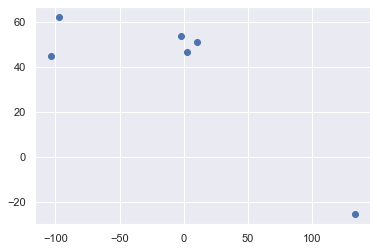

In [15]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.show()

# Feature Extraction

In [16]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [17]:
kmeans = KMeans(2) #where 2 represents the number of clusters
kmeans.fit(x)

KMeans(n_clusters=2)

# Results

In [18]:
result = kmeans.fit_predict(x)
result

array([1, 1, 1, 1, 1, 0])

In [19]:
resultdf = data.copy()
resultdf['Clusters'] = result
resultdf

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


# Visual Results

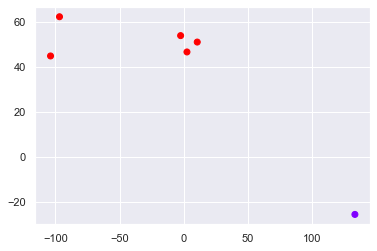

In [22]:
plt.scatter(resultdf['Longitude'], resultdf['Latitude'], c = resultdf['Clusters'], cmap = 'rainbow')
plt.show()

# Repeating for three clusters

In [23]:
kmeans = KMeans(3) #where 3 represents the number of clusters
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
result = kmeans.fit_predict(x)
result

array([1, 1, 0, 0, 0, 2])

In [25]:
resultdf = data.copy()
resultdf['Clusters'] = result
resultdf

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


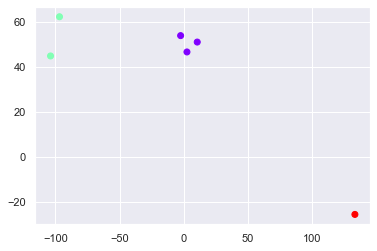

In [26]:
plt.scatter(resultdf['Longitude'], resultdf['Latitude'], c = resultdf['Clusters'], cmap = 'rainbow')
plt.show()

# Clustering Based on Language

In [27]:
x = data.iloc[:, 3:4]
x

,Language
0,English
1,English
2,French
3,English
4,German
5,English


In [30]:
newdata = pd.get_dummies(x, drop_first = True)
newdata

,Language_French,Language_German
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,0


In [31]:
kmeans = KMeans(3) #where 3 represents the number of clusters
kmeans.fit(newdata)

KMeans(n_clusters=3)

In [33]:
result = kmeans.fit_predict(newdata)
result

array([0, 0, 1, 0, 2, 0])

In [34]:
resultdf = data.copy()
resultdf['Clusters'] = result
resultdf

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


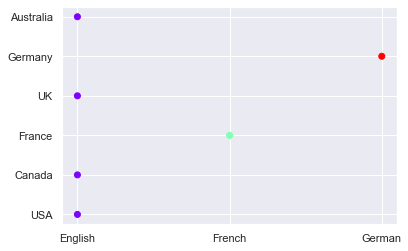

In [36]:
plt.scatter(resultdf['Language'], resultdf['Country'], c = resultdf['Clusters'], cmap = 'rainbow')
plt.show()